In [1]:
import numpy as np
from TDD.TDD import Ini_TDD,Clear_TDD,set_index_order,get_tdd
from TDD.TDD_Q import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD.TDD_Q import reshape as reshape2
from TDD.TN import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
from sympy import *

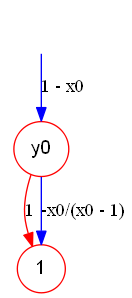

In [2]:
Ini_TDD(['x0','y0','x1','y1'])
A=['x0','y0','x1','y1']
[x0,y0,x1,y1]=symbols(A)
U=np.array([1-x0,x0])
var=[Index('y0')]
ts1=Tensor(U,var)
ts1.tdd().show()
# ts2=Tensor(U,var)

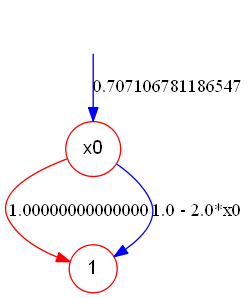

In [3]:
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
var2=[Index('x0'),Index('y0')]
ts2=Tensor(H,var2)
tn=TensorNetwork([ts1,ts2])
tdd=tn.cont()
tdd.show()
# Clear_TDD()

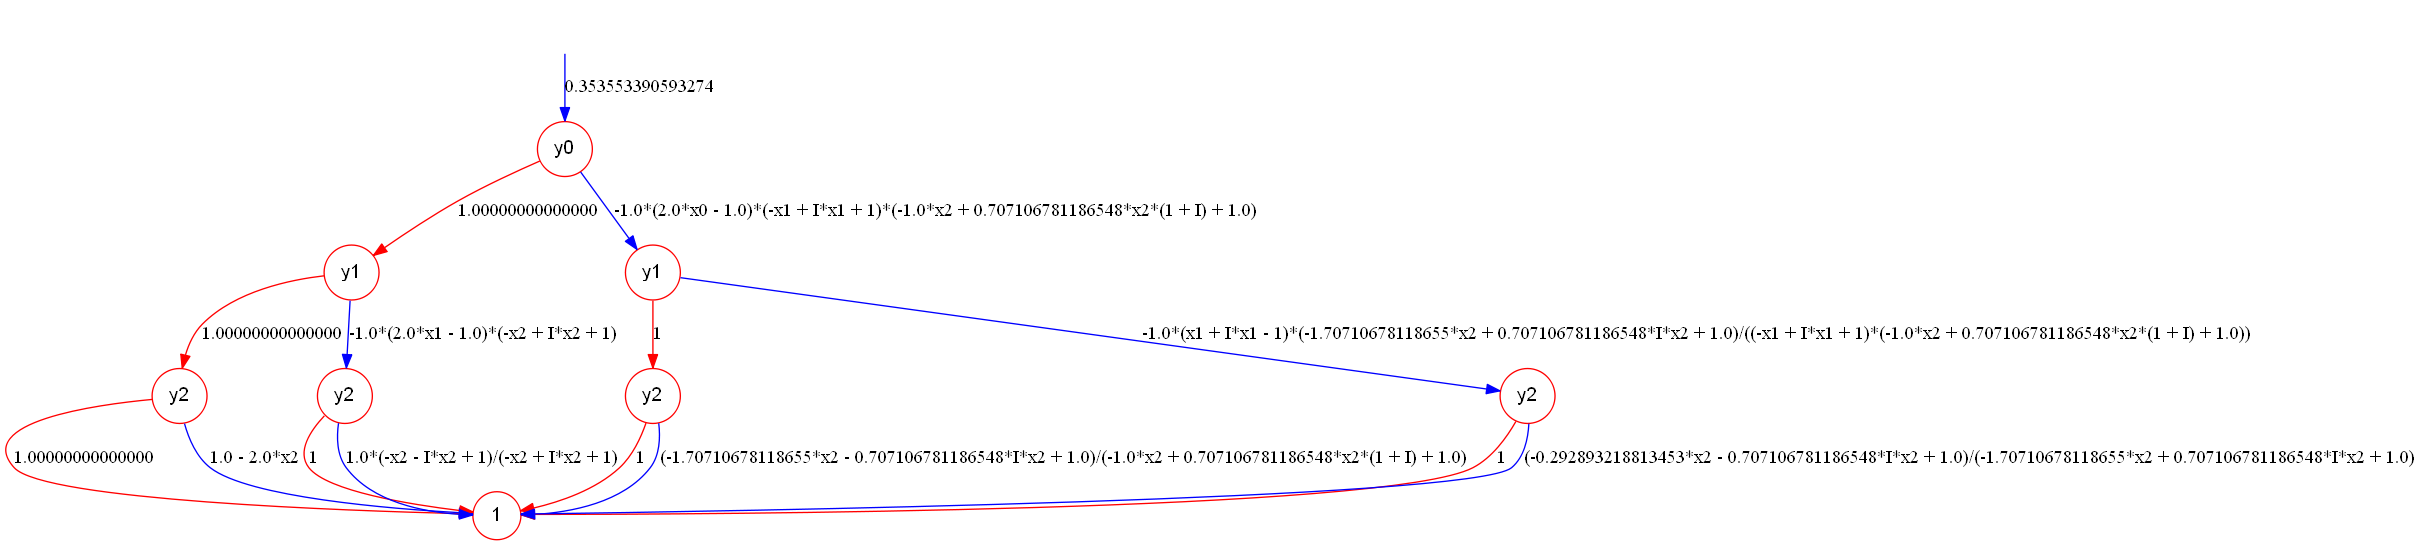

In [4]:
path='Benchmarks/'
file_name='qft_3.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,indices=cir_2_tn(cir)
for k in range(3):
    x_k='x'+str(k)
    s=Symbol(x_k,bool=True)
    U=np.array([1-s,s])
#     U=np.array([1,0])
    temp_ts=Tensor(U,[Index(x_k)])
    tn.tensors.insert(0,temp_ts)
Ini_TDD(indices)
tdd=tn.cont()
tdd.show()

16


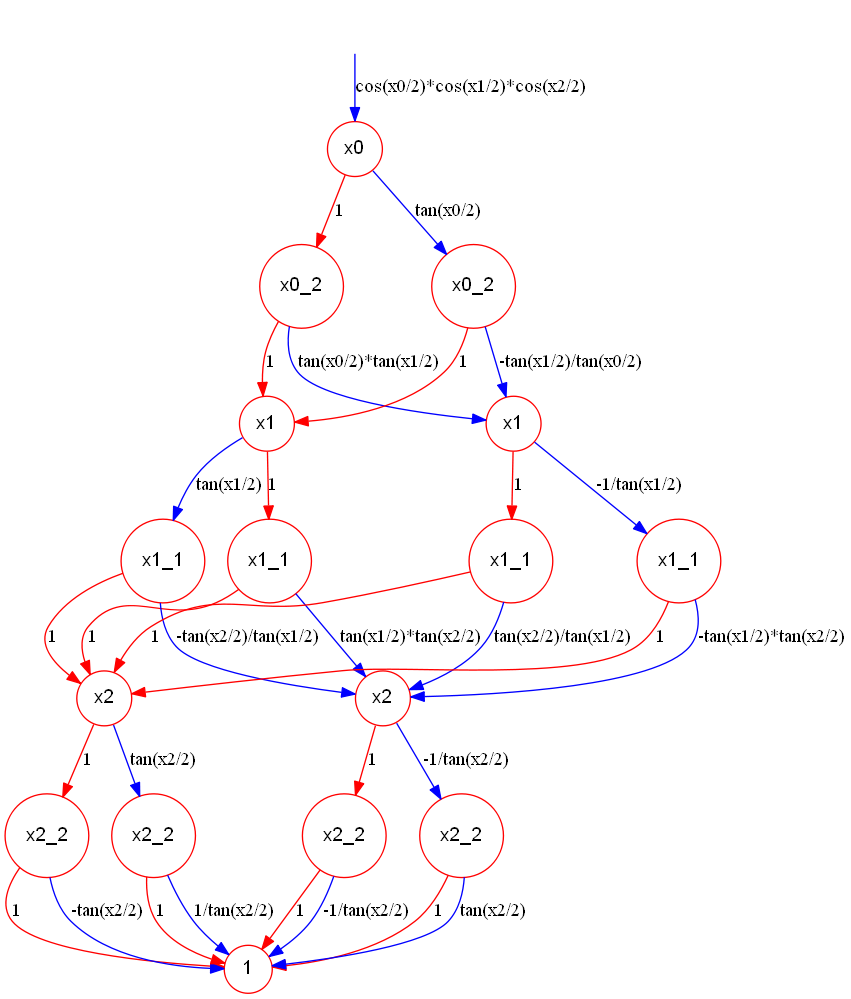

In [5]:
Clear_TDD()
indices=['x0','x1','x2','x0_1','x1_1','x2_1','x0_2','x1_2','x2_2']
indices=['x0','x0_1','x0_2','x1','x1_1','x1_2','x2','x2_1','x2_2']
tn=TensorNetwork([])
for k in range(3):
    x_k='x'+str(k)
    x_k_1='x'+str(k)+'_'+str(1)
#     x_k_1='x'+str(k)+'_'+str(2)
    s=Symbol(x_k)
    U=np.array([[cos(s/2),-sin(s/2)],[sin(s/2),cos(s/2)]])
    temp_ts=Tensor(U,[Index(x_k),Index(x_k_1)])
    tn.tensors.append(temp_ts)
U=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
U=reshape2(U)
temp_ts=Tensor(U,[Index('x0_1'),Index('x0_2'),Index('x1_1'),Index('x1_2')])
tn.tensors.append(temp_ts)
temp_ts=Tensor(U,[Index('x1_1'),Index('x1_2'),Index('x2_1'),Index('x2_2')])
tn.tensors.append(temp_ts)
Ini_TDD(indices)
tdd=tn.cont()
print(tdd.node_number())
tdd.show()

40


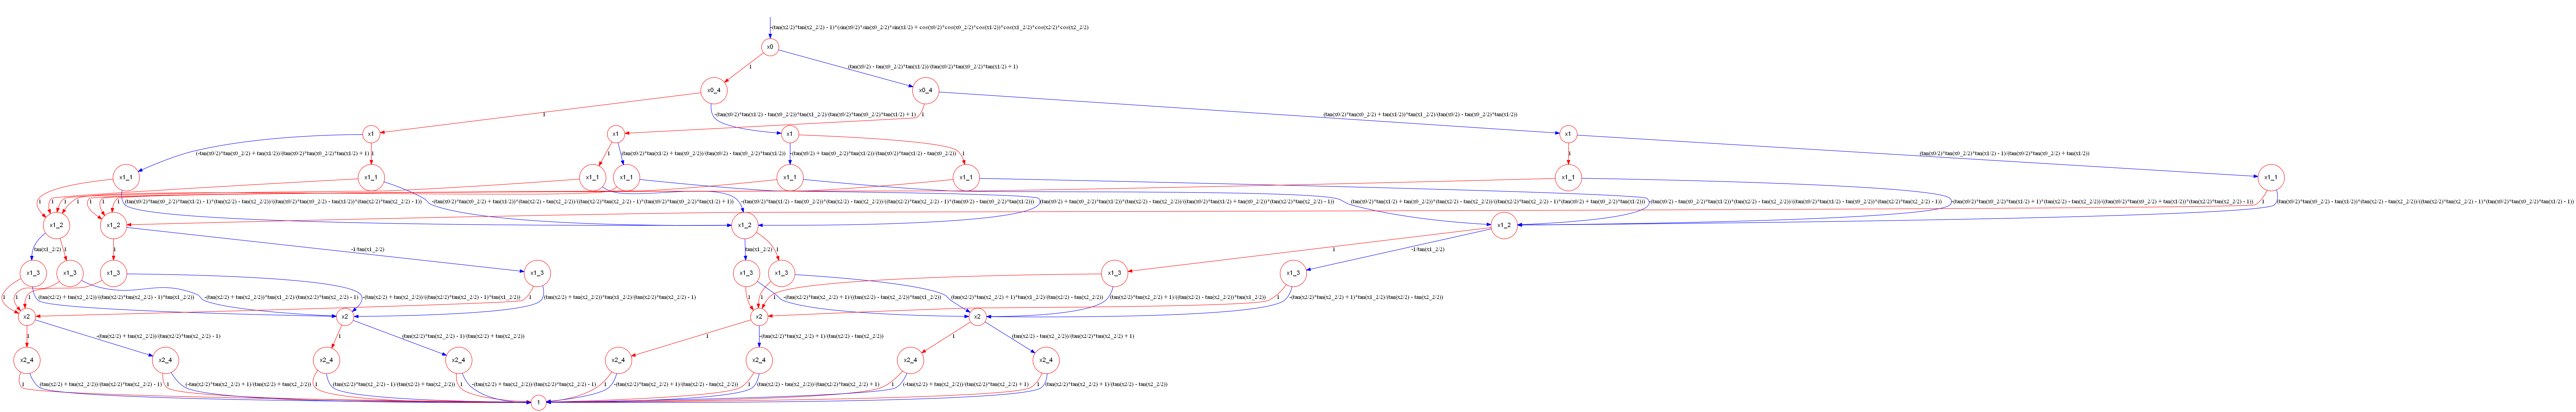

In [6]:
Clear_TDD()
indices=['x0','x0_1','x0_2','x0_3','x0_4','x1','x1_1','x1_2','x1_3','x1_4','x2','x2_1','x2_2','x2_3','x2_4']
tn=TensorNetwork([])
for k in range(3):
    x_k='x'+str(k)
    x_k_1='x'+str(k)+'_'+str(1)
#     x_k_1='x'+str(k)+'_'+str(2)
    s=Symbol(x_k)
    U=np.array([[cos(s/2),-sin(s/2)],[sin(s/2),cos(s/2)]])
    temp_ts=Tensor(U,[Index(x_k),Index(x_k_1)])
    tn.tensors.append(temp_ts)
U=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
U=reshape2(U)
temp_ts=Tensor(U,[Index('x0_1'),Index('x0_2'),Index('x1_1'),Index('x1_2')])
tn.tensors.append(temp_ts)
temp_ts=Tensor(U,[Index('x1_1'),Index('x1_2'),Index('x2_1'),Index('x2_2')])
tn.tensors.append(temp_ts)

for k in range(3):
    x_k='x'+str(k)+'_'+str(2)
    x_k_1='x'+str(k)+'_'+str(3)
#     x_k_1='x'+str(k)+'_'+str(2)
    s=Symbol(x_k)
    U=np.array([[cos(s/2),-sin(s/2)],[sin(s/2),cos(s/2)]])
    temp_ts=Tensor(U,[Index(x_k),Index(x_k_1)])
    tn.tensors.append(temp_ts)
U=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
U=reshape2(U)
temp_ts=Tensor(U,[Index('x0_3'),Index('x0_4'),Index('x1_3'),Index('x1_4')])
tn.tensors.append(temp_ts)
temp_ts=Tensor(U,[Index('x1_3'),Index('x1_4'),Index('x2_3'),Index('x2_4')])
tn.tensors.append(temp_ts)

Ini_TDD(indices)
tdd=tn.cont()
print(tdd.node_number())
tdd.show()

In [7]:
# from qiskit.circuit import Parameter
# from qiskit.quantum_info.operators import Operator

In [8]:
# theta = Parameter('x0')
# qc = QuantumCircuit(3, 1)
# qc.h(0)
# qc.ry(theta, range(3))
# print(qc.data[1])
# # print(Operator(qc.data[1][0]))
# qc.draw()

In [9]:
# s=Symbol('x',bool=True)
# (~s)/(s)

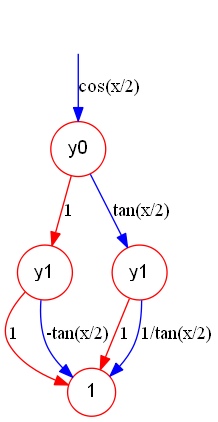

In [10]:
Ini_TDD(['y0','y1'])
s=Symbol('x')
U=np.array([[cos(s/2),-sin(s/2)],[sin(s/2),cos(s/2)]])
temp_ts=Tensor(U,[Index('y0'),Index('y1')])
# tn.tensors.append(temp_ts)
temp_ts.tdd().show()